# SOCIETE 

*** Dans la premiere matrice on place les riches(modélisé à 1) et les pauvres (modélisé à 0) selon la probabilités que nous donnons ***

In [1]:

import numpy as np
import random

def tableauBase(P):
    """les O sont les batiments pauvres et 1 les batiments riches."""
    tableau_de_zero_un = np.zeros((10,10), dtype='i')
    for i in range(len(tableau_de_zero_un)):
        for j in range(len(tableau_de_zero_un)):
            if random.random() < P :
                tableau_de_zero_un[i,j] = 1
    print("\n\n\t\t VILLE BASIQUE\n\n\n")
    print(tableau_de_zero_un)
    return tableau_de_zero_un
    
tableauBase(0.6)



		 VILLE BASIQUE



[[1 1 0 1 0 0 0 0 0 0]
 [1 0 1 1 0 1 0 0 1 1]
 [1 1 0 0 1 1 0 0 0 0]
 [1 1 1 1 0 1 0 1 1 1]
 [0 1 1 0 1 1 1 0 0 0]
 [0 1 1 0 1 0 1 1 0 0]
 [0 1 0 0 1 0 1 1 0 1]
 [1 1 1 0 1 0 1 1 1 1]
 [0 1 0 0 1 1 1 1 0 1]
 [0 1 0 1 1 0 1 1 0 0]]


array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 0, 1, 1, 0, 0]], dtype=int32)

*** la deuxieme matrice represente la creation de gang dû à la présence d'un " carré"(de -1) de 4 "batiments" de pauvres.***

In [9]:

import numpy as np

def creationDeGang(tab,P):
    """H: nous voulons savoir si un carré crée un groupe de gang (nommé 3)"""
    tableau = tab.copy()
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                 if tableau[i,j] == 0 and tableau[i+1,j]==0  and tableau[i,j+1]==0 and tableau[i+1,j+1]==0 :
                    tableau[i,j] = -1
                    tableau[i+1,j]=-1 
                    tableau[i,j+1]=-1
                    tableau[i+1,j+1]=-1           
    print("\n\n\t\t VILLE AVEC GANG\n\n\n")
    print(tableau)
    return tableau

tab = creationDeGang(tableauBase(0.5),0.5)



		 VILLE BASIQUE



[[1 0 0 1 1 0 1 1 0 0]
 [1 1 0 0 1 1 1 0 1 1]
 [0 1 1 0 1 0 1 0 0 0]
 [1 1 0 1 0 1 0 1 1 1]
 [1 0 0 0 1 1 1 0 0 1]
 [1 1 0 0 1 1 1 1 0 0]
 [1 1 0 1 1 0 0 0 0 1]
 [1 0 1 1 0 1 0 0 0 1]
 [0 0 0 1 0 1 1 1 0 0]
 [1 1 1 0 1 1 1 0 1 0]]


		 VILLE AVEC GANG



[[ 1  0  0  1  1  0  1  1  0  0]
 [ 1  1  0  0  1  1  1  0  1  1]
 [ 0  1  1  0  1  0  1  0  0  0]
 [ 1  1  0  1  0  1  0  1  1  1]
 [ 1  0 -1 -1  1  1  1  0  0  1]
 [ 1  1 -1 -1  1  1  1  1  0  0]
 [ 1  1  0  1  1  0 -1 -1  0  1]
 [ 1  0  1  1  0  1 -1 -1  0  1]
 [ 0  0  0  1  0  1  1  1  0  0]
 [ 1  1  1  0  1  1  1  0  1  0]]


***les carrés de violet seront les gangs crée ,je 1 est en jaune et en bleu le 0***

***On remarque que il y a des gangs qui se crée peu a peu dû à la grande présence de 0 (de pauvreté)***



		 VILLE BASIQUE



[[1 0 0 0 1 1 0 1 1 0]
 [1 1 0 0 1 0 0 0 1 0]
 [1 0 1 1 1 0 1 1 1 1]
 [0 1 0 1 0 1 0 1 1 0]
 [0 0 0 1 0 0 0 0 1 1]
 [0 1 0 0 1 1 0 0 0 1]
 [0 1 0 1 0 0 0 1 1 1]
 [0 1 0 1 0 1 0 0 1 0]
 [0 1 0 0 0 0 1 0 1 1]
 [1 1 0 1 0 0 1 0 0 1]]


		 VILLE AVEC GANG



[[ 1  0  0  0  1  1  0  1  1  0]
 [ 1  1  0  0  1  0  0  0  1  0]
 [ 1  0  1  1  1  0  1  1  1  1]
 [ 0  1  0  1  0  1  0  1  1  0]
 [ 0  0  0  1  0  0 -1 -1  1  1]
 [ 0  1  0  0  1  1 -1 -1  0  1]
 [ 0  1  0  1  0  0  0  1  1  1]
 [ 0  1  0  1  0  1  0  0  1  0]
 [ 0  1  0  0 -1 -1  1  0  1  1]
 [ 1  1  0  1 -1 -1  1  0  0  1]]


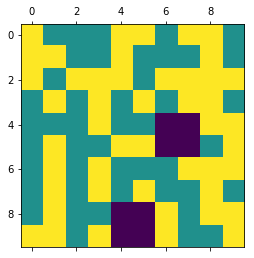

In [8]:
import matplotlib.pyplot as plt

# Display matrix
plt.matshow(creationDeGang(tableauBase(0.5),0.5))
plt.show()



    *** 11/03 : création de programmes qui calcule la moyenne de l'entourage d'un 1 ou 0 (fait par urbain) ,creation de la list qui enregistre ceux qui on un bon ou un mauvais entourage et modifie  la matrice en conditionset presente le tout (danny) ,recherche documentale qui permettra de faire le parallele entre les  programmes utilisé  ***

In [11]:
def voisins(tab, rowNumber, columnNumber):
    '''
    Petite fonction pour récupérer les voisins
    '''
    N = []
    for i in range(rowNumber-1, rowNumber+2):
        for j in range(columnNumber-1, columnNumber+2):
            if  (i >= 0 and i < tab.shape[0]) and (j >= 0 and j < tab.shape[1]) and ((i,j)!=(rowNumber,columnNumber)):
                N.append(tab[i,j])
    return N


In [10]:
def moyenne_voisins(tab,i,j):
    '''
    Calcul de la moyenne des valeurs voisinnes
    '''
    N = voisins(tab,i,j)
    return sum(N)/len(N)
    
moyenne_voisins(tab,6,4)

0.5

In [12]:
def Ldemande(tableau,P):
    """ quand on fait le parcours de tableau on voit l'entourage et on place dans une liste (liste demande) les demande de demenagement"""
    
    #DM : list[int]
    DM = []
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            #if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0 :
                if (tableau[i,j] == 1 and  moyenne_voisins(tableau,i,j) > 0.5) or (tableau[i,j] == 0 and  moyenne_voisins(tableau,i,j) < 0.5) :
                    DM.append(tableau[i,j])
                                             
    return DM
Ldemande(tableauBase(0.5) ,0.5)





		 VILLE BASIQUE



[[0 1 0 0 1 1 0 1 0 0]
 [1 1 1 0 0 0 1 0 0 0]
 [1 1 0 1 1 1 1 1 0 0]
 [0 1 1 0 1 1 1 0 1 1]
 [0 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 1 0 1]
 [0 0 1 1 0 1 0 1 1 0]
 [0 0 1 1 1 0 0 1 1 1]
 [0 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 1 1 1 1 0 0]]


[1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0]

In [28]:
# def moyenne(tableau,i, j):
#     """int*int -> Number 
#        Calcule la moyenne 1 case autour de la case définie par (i,j)
#     """
#     n_line, n_col = tableau.shape
#     moyenne = 0 
    
#     if i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0 : 
#         moyenne = (tableau[i-1,j-1] + tableau[i,j-1] + tableau[i+1,j-1] + tableau[i-1,j] + tableau[i+1,j] + tableau[i-1,j+1] + tableau[i,j+1] + tableau[i+1,j+1])/8
    
#     return moyenne

#     if True:
#         pass
#     elif i == 0 and j == 0 : # coin haut gauche
#         moyenne = (tableau[i+1,j] + tableau[i+1,j+1] + tableau[i,j+1])/3
        
#     elif i == 0 and j == n_col-1 : # coin haut droite
#         moyenne = (tableau[i+1,j] + tableau[i+1,j-1] +tableau[i,j-1])/3
        
#     elif i == n_line-1 and j == 0 : #coin bas gauche
#         moyenne =(tableau[i-1,j]+ tableau[i-1,j+1] + tableau[i,j+1])/3
        
#     elif i == n_line-1 and j == n_col-1 :#coin bas droite
#         moyenne = (tableau[i,j-1] + tableau[i-1,j-1] + tableau[i-1,j])/3
        
#     elif i >=1 and i <= n_line-2 and j == 0 : #ligne gauche
#         moyenne = (tableau[i-1,j] + tableau[i-1, j+1] + tableau[i, j+1] + tableau[i+1,j+1] + tableau[i+1, j])/5
        
#     elif i == n_line-1 and j >= 1 and j <= n_col-2 : #ligne bas
#         moyenne = (tableau[i, j -1] + tableau[i-1,j-1] + tableau[i-1,j] + tableau[i-1,j+1] + tableau[i,j+1])/5
        
#     elif i >= 1 and i <= n_line-2 and j == n_col-1 : #ligne droite
#         moyenne = (tableau[i-1,j] + tableau[i-1,j-1] + tableau[i,j-1] + tableau[i-1, j-1] + tableau[i-1,j-1] )/5
        
#     elif i == 0 and j<= n_line -2 and j >= 1 : #ligne haut
#         moyenne = (tableau[i,j+1] + tableau[i+1,j+1] + tableau [i+1,j] + tableau[i-1,j-1] + tableau[i,j+1] )/5
    
#     return moyenne

0

In [22]:
def posedemenagement(tab,P):
    """transformation de personne qui on demande de demenager => case 1 ou 0 devient 2 represente la demande de demenagement """
    tableau = tab.copy()
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
             if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0 :
                    if (tableau[i,j] == 1 and  moyenne_voisins(tableau,i,j) < 0.5) or (tableau[i,j] == 0 and  moyenne_voisins(tableau,i,j) > 0.5 ) :
                        tableau[i,j] = 2
    print("\n\n\t\t REACTION HABITANT\n\n\n")
    print(tableau)
    return tableau 
posedemenagement(tab,0.5)





		 REACTION HABITANT



[[0 1 0 0 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 2 2 1 1 1]
 [1 0 0 0 2 1 1 1 1 0]
 [1 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 2 2 0 0 0 1 1 1 1]
 [0 0 2 2 0 0 1 1 1 0]
 [0 0 0 1 0 0 1 0 0 0]]


array([[0, 1, 0, 0, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 2, 2, 1, 1, 1],
       [1, 0, 0, 0, 2, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 2, 2, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 2, 2, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0]], dtype=int32)

***journee programme fini ***

In [23]:
def demenagement(tableau,tab_base,L,P):
    """deplacement de personne"""
    
    #ind : int
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            
             if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                    
                    if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) >= 0.5 :
                        for demandeur in range (0,len(L)-1):
                             if L[demandeur] == 1:
                                tableau[i,j] = L[demandeur]
                                L[demandeur] = -2
                                break
                                
                    if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) < 0.5 :
                        for demandeur in range (0,len(L)-1):
                            if L[demandeur] == 0 :
                                tableau[i,j] = L[demandeur]
                                L[demandeur] = -2
                                break
                                
    print("\n\n\t NOUVEAU  QUARTIER \n\n\n")
    print(tableau)
    return tableau

tab_base = tableauBase(0.5)
L = Ldemande(tab_base,0.5)
tab = posedemenagement(tab_base,0.5)
demenagement(tab,tab_base,L,0.5)




		 VILLE BASIQUE



[[0 0 0 1 1 0 1 0 0 0]
 [1 1 1 1 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 1 0 0]
 [0 1 1 0 0 1 0 0 0 1]
 [1 1 1 1 1 0 1 0 0 1]
 [1 0 1 0 1 1 1 1 0 0]
 [0 1 1 0 1 0 0 0 0 1]
 [1 1 1 0 1 0 0 0 1 1]
 [0 1 0 1 1 0 1 0 0 0]
 [1 1 1 1 1 0 0 0 0 1]]


		 REACTION HABITANT



[[0 0 0 1 1 0 1 0 0 0]
 [1 2 1 1 0 0 0 0 0 1]
 [1 2 2 1 0 0 0 2 0 0]
 [0 1 1 2 2 1 0 0 0 1]
 [1 1 1 1 1 2 1 0 0 1]
 [1 2 1 2 1 1 1 2 0 0]
 [0 1 1 2 1 2 2 2 2 1]
 [1 1 1 2 1 2 2 2 1 1]
 [0 1 2 1 1 2 1 2 2 0]
 [1 1 1 1 1 0 0 0 0 1]]


	 NOUVEAU  QUARTIER 



[[0 0 0 1 1 0 1 0 0 0]
 [1 0 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 0 0 1]
 [1 1 1 1 1 1 1 0 0 1]
 [1 1 1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [0 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0 0 1]]


array([[0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 1]], dtype=int32)



	 NOUVEAU  QUARTIER 



[[0 0 0 1 1 0 1 0 0 0]
 [1 0 1 1 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 0 0 1]
 [1 1 1 1 1 1 1 0 0 1]
 [1 1 1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [0 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0 0 1]]


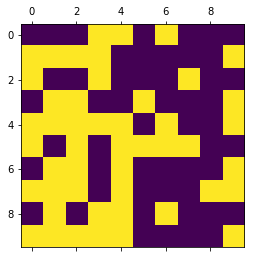

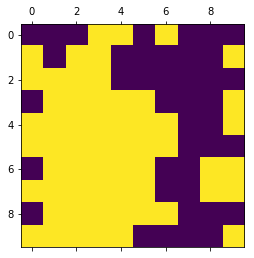

In [24]:
import matplotlib.pyplot as plt

# Display matrix
plt.matshow (tab_base)
plt.matshow(demenagement(tab,tab_base,L,0.5))
plt.show()